# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

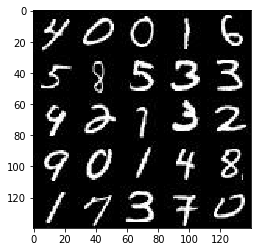

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

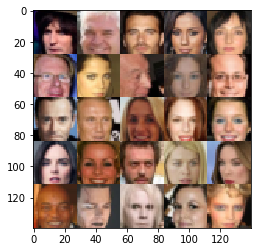

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(tf.float32, 
                           shape=(None, image_width, image_height, image_channels), 
                           name='input_real')
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    #learning_rate = tf.Variable(0.01, False, name='learning_rate')
    return inputs, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [29]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #inputs = tf.reshape(images, [-1, images.shape[1] * images.shape[2] * images.shape[3]])
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse): # finish this
        h0 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        h0 = tf.layers.batch_normalization(h0, training=True)
        h0 = tf.maximum(alpha*h0, h0)
        
        h1 = tf.layers.conv2d(h0, 128, 5, strides=2, padding='same', activation=None)
        h1 = tf.layers.batch_normalization(h1, training=True)
        h1 = tf.maximum(alpha*h1, h1)
        
        h2 = tf.layers.conv2d(h1, 256, 5, strides=2, padding='same', activation=None)
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha*h2, h2)
        
        h3 = tf.layers.conv2d(h2, 512, 5, strides=2, padding='same', activation=None)
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha*h3, h3)
        
        logits = tf.layers.dense(tf.contrib.layers.flatten(h3), 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [35]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    def conv_out_size_same(size, stride):
        return math.ceil(float(size) / float(stride))
    
    reuse = not is_train
    d1 = 7
    d2 = 512
    alpha=0.1
    with tf.variable_scope('generator', reuse=reuse):
        h0 = tf.layers.dense(z, units=d1 * d1 * d2, activation=None)
        h0 = tf.reshape(h0, [-1, d1, d1, d2])
        
        h1 = tf.layers.conv2d_transpose(h0, 256, 5, strides=1, padding='same')
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha*h1, h1)
        
        h2 = tf.layers.conv2d_transpose(h1, 128, 5, strides=2, padding='same')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha*h2, h2)
        
        h3 = tf.layers.conv2d_transpose(h2, 64, 5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha*h3, h3)
        
        h4 = tf.layers.conv2d_transpose(h3, 32, 5, strides=1, padding='same')
        h4 = tf.layers.batch_normalization(h4, training=is_train)
        h4 = tf.maximum(alpha*h4, h4)
        
        logits = tf.layers.conv2d_transpose(h4, out_channel_dim, 5, 1, 'same')
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    input_g = generator(input_z, out_channel_dim, is_train=True)
    output_real, d_logits_real = discriminator(input_real)
    output_g, d_logits_g = discriminator(input_g, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real)*(1-smooth)))
    d_loss_g = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_g, labels=tf.zeros_like(d_logits_g)))
    d_loss = d_loss_real + d_loss_g
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_g, labels=tf.ones_like(d_logits_g)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars) 
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        return (d_train_opt, g_train_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [38]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, _, _, img_channels = data_shape
    input_real, input_z, lr = model_inputs(28, 28, img_channels, z_dim=z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, img_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    step = 0 
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print(tf.trainable_variables())
        #learning_rate = tf.Variable(learning_rate, trainable=False)
        for epoch_i in range(epoch_count):

            for batch_images in get_batches(batch_size):
                batch_images *= 2.0
                # TODO: Train Model
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
            
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                
                step += 1
                
                if step % 50 == 0:
                    # At the end of every 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if step % 300 == 0:
                    print("step {}".format(step))
                    show_generator_output(sess, 25, input_z, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

[<tf.Variable 'generator/dense/kernel:0' shape=(100, 25088) dtype=float32_ref>, <tf.Variable 'generator/dense/bias:0' shape=(25088,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/kernel:0' shape=(5, 5, 256, 512) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/gamma:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/beta:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/kernel:0' shape=(5, 5, 128, 256) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/gamma:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/beta:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/kernel:0' shape=(5, 5, 64, 128) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/bias:0'

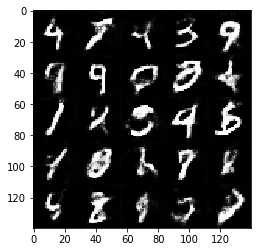

Epoch 1/2 Discriminator Loss: 1.4312 Generator Loss: 0.4402
Epoch 1/2 Discriminator Loss: 1.2226 Generator Loss: 0.6310
Epoch 1/2 Discriminator Loss: 1.2259 Generator Loss: 1.9284
Epoch 1/2 Discriminator Loss: 1.2477 Generator Loss: 0.5766
Epoch 1/2 Discriminator Loss: 1.0583 Generator Loss: 0.9217
Epoch 1/2 Discriminator Loss: 0.9545 Generator Loss: 0.9999
step 600


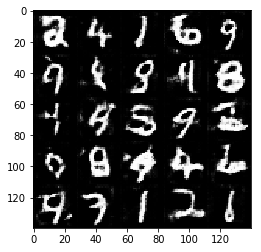

Epoch 1/2 Discriminator Loss: 1.0380 Generator Loss: 0.7948
Epoch 1/2 Discriminator Loss: 1.2177 Generator Loss: 0.6323
Epoch 1/2 Discriminator Loss: 0.9134 Generator Loss: 1.2358
Epoch 1/2 Discriminator Loss: 0.9965 Generator Loss: 1.0693
Epoch 1/2 Discriminator Loss: 0.8887 Generator Loss: 1.2164
Epoch 1/2 Discriminator Loss: 1.4453 Generator Loss: 0.4548
step 900


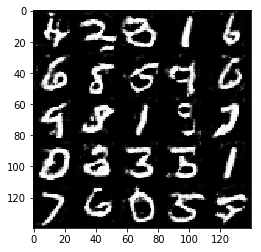

Epoch 2/2 Discriminator Loss: 1.1624 Generator Loss: 0.6372
Epoch 2/2 Discriminator Loss: 0.7718 Generator Loss: 1.2522
Epoch 2/2 Discriminator Loss: 1.5652 Generator Loss: 0.4236
Epoch 2/2 Discriminator Loss: 1.0812 Generator Loss: 1.4138
Epoch 2/2 Discriminator Loss: 1.0001 Generator Loss: 0.8575
Epoch 2/2 Discriminator Loss: 1.0067 Generator Loss: 0.8093
step 1200


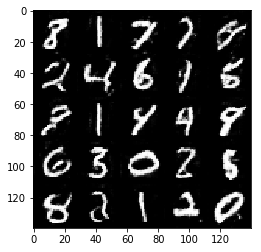

Epoch 2/2 Discriminator Loss: 1.3173 Generator Loss: 0.5248
Epoch 2/2 Discriminator Loss: 2.1645 Generator Loss: 0.2439
Epoch 2/2 Discriminator Loss: 1.7231 Generator Loss: 3.7592
Epoch 2/2 Discriminator Loss: 1.0089 Generator Loss: 0.8401
Epoch 2/2 Discriminator Loss: 0.9012 Generator Loss: 0.9747
Epoch 2/2 Discriminator Loss: 0.8390 Generator Loss: 1.4345
step 1500


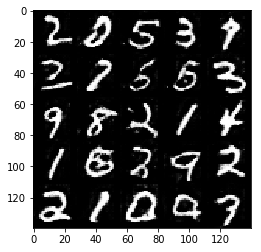

Epoch 2/2 Discriminator Loss: 1.7113 Generator Loss: 0.3812
Epoch 2/2 Discriminator Loss: 0.7622 Generator Loss: 2.2460
Epoch 2/2 Discriminator Loss: 1.1901 Generator Loss: 0.6184
Epoch 2/2 Discriminator Loss: 1.6830 Generator Loss: 0.3392
Epoch 2/2 Discriminator Loss: 0.9860 Generator Loss: 0.8231
Epoch 2/2 Discriminator Loss: 0.7098 Generator Loss: 1.2868
step 1800


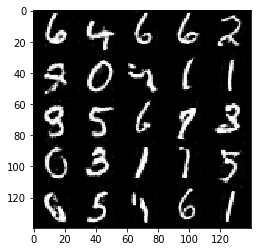

Epoch 2/2 Discriminator Loss: 1.2427 Generator Loss: 0.5923


In [39]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

[<tf.Variable 'generator/dense/kernel:0' shape=(150, 25088) dtype=float32_ref>, <tf.Variable 'generator/dense/bias:0' shape=(25088,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/kernel:0' shape=(5, 5, 256, 512) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/gamma:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/beta:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/kernel:0' shape=(5, 5, 128, 256) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/bias:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/gamma:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/beta:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/kernel:0' shape=(5, 5, 64, 128) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/bias:0'

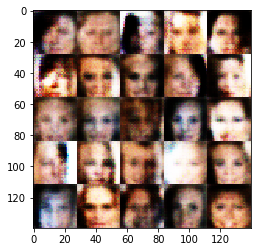

Epoch 1/1 Discriminator Loss: 1.4034 Generator Loss: 0.4631
Epoch 1/1 Discriminator Loss: 1.2760 Generator Loss: 1.8162
Epoch 1/1 Discriminator Loss: 1.6403 Generator Loss: 0.3541
Epoch 1/1 Discriminator Loss: 1.4893 Generator Loss: 0.4591
Epoch 1/1 Discriminator Loss: 1.2278 Generator Loss: 0.6248
Epoch 1/1 Discriminator Loss: 2.2366 Generator Loss: 4.1322
step 600


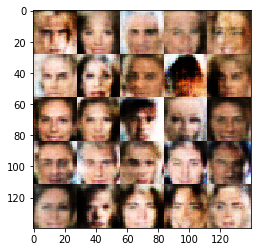

Epoch 1/1 Discriminator Loss: 1.1822 Generator Loss: 0.6552
Epoch 1/1 Discriminator Loss: 1.1976 Generator Loss: 1.2663
Epoch 1/1 Discriminator Loss: 0.8515 Generator Loss: 1.2663
Epoch 1/1 Discriminator Loss: 1.1304 Generator Loss: 0.6532
Epoch 1/1 Discriminator Loss: 1.0849 Generator Loss: 1.0869
Epoch 1/1 Discriminator Loss: 1.8023 Generator Loss: 0.3014
step 900


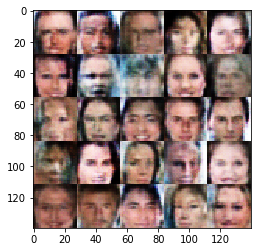

Epoch 1/1 Discriminator Loss: 2.0646 Generator Loss: 0.2319
Epoch 1/1 Discriminator Loss: 1.6874 Generator Loss: 0.3321
Epoch 1/1 Discriminator Loss: 1.4576 Generator Loss: 0.4182
Epoch 1/1 Discriminator Loss: 1.6973 Generator Loss: 0.3453
Epoch 1/1 Discriminator Loss: 1.4777 Generator Loss: 0.4097
Epoch 1/1 Discriminator Loss: 2.1873 Generator Loss: 3.2213
step 1200


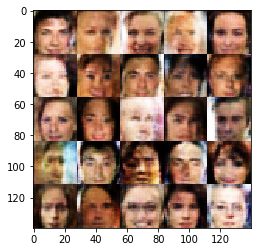

Epoch 1/1 Discriminator Loss: 1.4168 Generator Loss: 0.4527
Epoch 1/1 Discriminator Loss: 2.2597 Generator Loss: 3.2120
Epoch 1/1 Discriminator Loss: 0.6902 Generator Loss: 1.2931
Epoch 1/1 Discriminator Loss: 0.5667 Generator Loss: 1.7192
Epoch 1/1 Discriminator Loss: 0.5943 Generator Loss: 1.6110
Epoch 1/1 Discriminator Loss: 2.1607 Generator Loss: 0.2288
step 1500


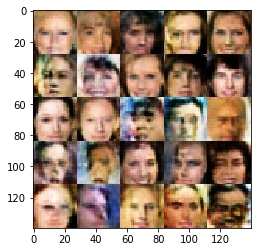

Epoch 1/1 Discriminator Loss: 0.5319 Generator Loss: 3.3231
Epoch 1/1 Discriminator Loss: 1.0637 Generator Loss: 0.7054
Epoch 1/1 Discriminator Loss: 0.9336 Generator Loss: 0.8521
Epoch 1/1 Discriminator Loss: 0.7136 Generator Loss: 2.7758
Epoch 1/1 Discriminator Loss: 0.6773 Generator Loss: 1.4017
Epoch 1/1 Discriminator Loss: 1.0081 Generator Loss: 0.8241
step 1800


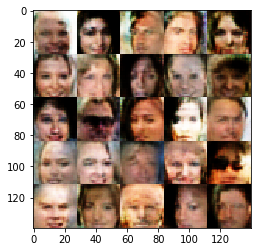

Epoch 1/1 Discriminator Loss: 1.0209 Generator Loss: 0.8971
Epoch 1/1 Discriminator Loss: 1.3836 Generator Loss: 0.4946
Epoch 1/1 Discriminator Loss: 0.6642 Generator Loss: 2.3529
Epoch 1/1 Discriminator Loss: 1.1121 Generator Loss: 0.6669
Epoch 1/1 Discriminator Loss: 0.5575 Generator Loss: 1.7056
Epoch 1/1 Discriminator Loss: 0.4328 Generator Loss: 3.0429
step 2100


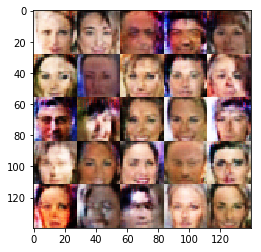

Epoch 1/1 Discriminator Loss: 0.8009 Generator Loss: 1.6774
Epoch 1/1 Discriminator Loss: 0.8906 Generator Loss: 1.5193
Epoch 1/1 Discriminator Loss: 1.0362 Generator Loss: 2.3766
Epoch 1/1 Discriminator Loss: 0.8729 Generator Loss: 1.3374
Epoch 1/1 Discriminator Loss: 0.9733 Generator Loss: 1.2321
Epoch 1/1 Discriminator Loss: 0.6648 Generator Loss: 1.6278
step 2400


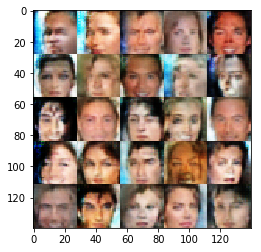

Epoch 1/1 Discriminator Loss: 0.5499 Generator Loss: 1.8738
Epoch 1/1 Discriminator Loss: 2.0104 Generator Loss: 0.2373
Epoch 1/1 Discriminator Loss: 0.9885 Generator Loss: 0.7786
Epoch 1/1 Discriminator Loss: 0.7923 Generator Loss: 1.3955
Epoch 1/1 Discriminator Loss: 1.7681 Generator Loss: 0.2854
Epoch 1/1 Discriminator Loss: 2.1269 Generator Loss: 0.2063
step 2700


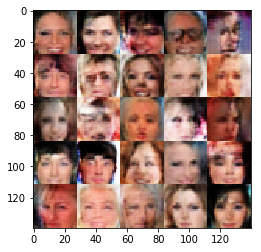

Epoch 1/1 Discriminator Loss: 1.3867 Generator Loss: 0.4554
Epoch 1/1 Discriminator Loss: 1.4301 Generator Loss: 0.4330
Epoch 1/1 Discriminator Loss: 1.0603 Generator Loss: 1.5069
Epoch 1/1 Discriminator Loss: 0.9953 Generator Loss: 0.9139
Epoch 1/1 Discriminator Loss: 1.1163 Generator Loss: 0.7537
Epoch 1/1 Discriminator Loss: 1.0115 Generator Loss: 0.7850
step 3000


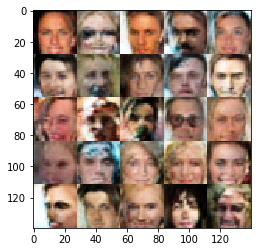

Epoch 1/1 Discriminator Loss: 1.5975 Generator Loss: 0.3678
Epoch 1/1 Discriminator Loss: 1.2172 Generator Loss: 1.8397
Epoch 1/1 Discriminator Loss: 3.1117 Generator Loss: 0.0921
Epoch 1/1 Discriminator Loss: 0.7623 Generator Loss: 1.2648
Epoch 1/1 Discriminator Loss: 1.8309 Generator Loss: 0.3222
Epoch 1/1 Discriminator Loss: 1.7551 Generator Loss: 0.2984
step 3300


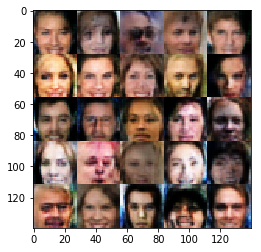

Epoch 1/1 Discriminator Loss: 1.4590 Generator Loss: 0.4370
Epoch 1/1 Discriminator Loss: 2.0046 Generator Loss: 0.2391
Epoch 1/1 Discriminator Loss: 0.8073 Generator Loss: 1.1794
Epoch 1/1 Discriminator Loss: 0.5239 Generator Loss: 2.0038
Epoch 1/1 Discriminator Loss: 0.9297 Generator Loss: 0.8818
Epoch 1/1 Discriminator Loss: 0.8149 Generator Loss: 1.9357
step 3600


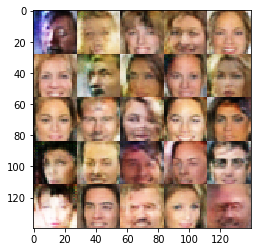

Epoch 1/1 Discriminator Loss: 1.9413 Generator Loss: 0.2625
Epoch 1/1 Discriminator Loss: 0.8695 Generator Loss: 1.8067
Epoch 1/1 Discriminator Loss: 2.5419 Generator Loss: 4.0229
Epoch 1/1 Discriminator Loss: 1.4043 Generator Loss: 0.4944
Epoch 1/1 Discriminator Loss: 0.9617 Generator Loss: 0.8642
Epoch 1/1 Discriminator Loss: 1.2690 Generator Loss: 0.5962
step 3900


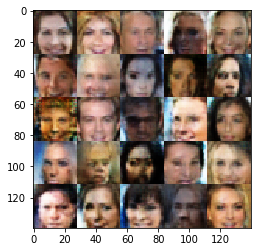

Epoch 1/1 Discriminator Loss: 2.6607 Generator Loss: 0.1325
Epoch 1/1 Discriminator Loss: 1.2456 Generator Loss: 0.5492
Epoch 1/1 Discriminator Loss: 0.9372 Generator Loss: 0.8667
Epoch 1/1 Discriminator Loss: 0.9223 Generator Loss: 1.8966
Epoch 1/1 Discriminator Loss: 2.3792 Generator Loss: 0.1522
Epoch 1/1 Discriminator Loss: 2.4608 Generator Loss: 0.1699
step 4200


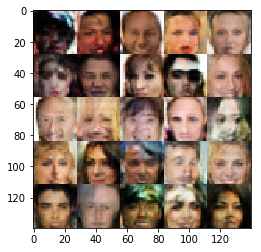

Epoch 1/1 Discriminator Loss: 1.9974 Generator Loss: 0.2372
Epoch 1/1 Discriminator Loss: 0.7417 Generator Loss: 1.3699
Epoch 1/1 Discriminator Loss: 1.0451 Generator Loss: 0.8137
Epoch 1/1 Discriminator Loss: 3.0235 Generator Loss: 0.0927
Epoch 1/1 Discriminator Loss: 1.7609 Generator Loss: 0.3105
Epoch 1/1 Discriminator Loss: 0.9073 Generator Loss: 1.0180
step 4500


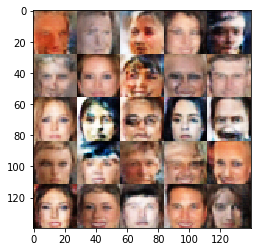

Epoch 1/1 Discriminator Loss: 2.3019 Generator Loss: 0.1762
Epoch 1/1 Discriminator Loss: 1.6832 Generator Loss: 0.3167
Epoch 1/1 Discriminator Loss: 0.9342 Generator Loss: 0.9140
Epoch 1/1 Discriminator Loss: 0.5716 Generator Loss: 1.7180
Epoch 1/1 Discriminator Loss: 1.4430 Generator Loss: 0.4303
Epoch 1/1 Discriminator Loss: 2.9820 Generator Loss: 0.1075
step 4800


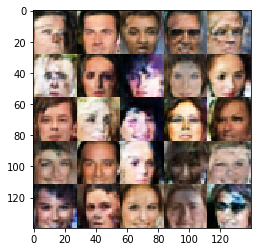

Epoch 1/1 Discriminator Loss: 0.9502 Generator Loss: 1.0006
Epoch 1/1 Discriminator Loss: 1.4631 Generator Loss: 0.4538
Epoch 1/1 Discriminator Loss: 1.4318 Generator Loss: 0.4507
Epoch 1/1 Discriminator Loss: 2.2556 Generator Loss: 0.1728
Epoch 1/1 Discriminator Loss: 0.9688 Generator Loss: 0.8769
Epoch 1/1 Discriminator Loss: 0.7812 Generator Loss: 2.0098
step 5100


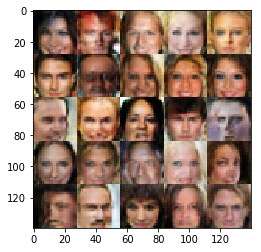

Epoch 1/1 Discriminator Loss: 0.9301 Generator Loss: 1.6824
Epoch 1/1 Discriminator Loss: 2.2736 Generator Loss: 0.1872
Epoch 1/1 Discriminator Loss: 1.3966 Generator Loss: 0.4802
Epoch 1/1 Discriminator Loss: 2.1202 Generator Loss: 0.2128
Epoch 1/1 Discriminator Loss: 2.6512 Generator Loss: 0.1315
Epoch 1/1 Discriminator Loss: 2.2475 Generator Loss: 0.1999
step 5400


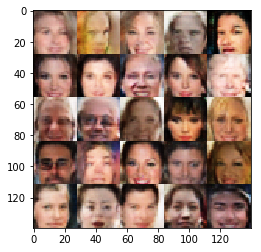

Epoch 1/1 Discriminator Loss: 1.3057 Generator Loss: 0.5162
Epoch 1/1 Discriminator Loss: 1.6717 Generator Loss: 0.3262
Epoch 1/1 Discriminator Loss: 1.2257 Generator Loss: 0.6059
Epoch 1/1 Discriminator Loss: 1.8860 Generator Loss: 0.2614
Epoch 1/1 Discriminator Loss: 2.4912 Generator Loss: 0.1383
Epoch 1/1 Discriminator Loss: 2.0908 Generator Loss: 0.2254
step 5700


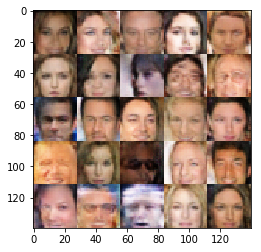

Epoch 1/1 Discriminator Loss: 2.5942 Generator Loss: 0.1596
Epoch 1/1 Discriminator Loss: 1.5658 Generator Loss: 0.3728
Epoch 1/1 Discriminator Loss: 2.5895 Generator Loss: 0.1311
Epoch 1/1 Discriminator Loss: 0.7098 Generator Loss: 1.2464
Epoch 1/1 Discriminator Loss: 2.5346 Generator Loss: 0.1714
Epoch 1/1 Discriminator Loss: 2.3239 Generator Loss: 3.7374
step 6000


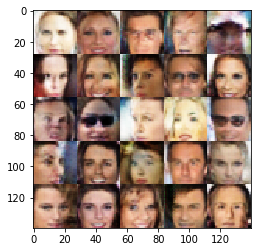

Epoch 1/1 Discriminator Loss: 1.0294 Generator Loss: 0.8077
Epoch 1/1 Discriminator Loss: 1.9364 Generator Loss: 0.2559
Epoch 1/1 Discriminator Loss: 1.5430 Generator Loss: 0.3798
Epoch 1/1 Discriminator Loss: 3.2759 Generator Loss: 0.0684
Epoch 1/1 Discriminator Loss: 2.6691 Generator Loss: 0.1279
Epoch 1/1 Discriminator Loss: 0.9779 Generator Loss: 0.8836
step 6300


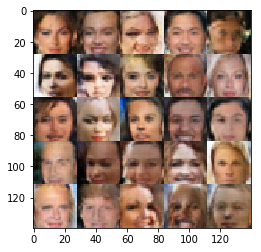

CPU times: user 5min 4s, sys: 2min 3s, total: 7min 8s
Wall time: 7min 12s


In [44]:
%%time
batch_size = 32
z_dim = 150
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.